In [3]:
import numpy as np
from scipy.special import gamma
import math

# Parameters
sigma_1, sigma_2, sigma_3 = 0.2, 0.25, 0.3
r = 0.05
rho_12, rho_13, rho_23 = 0.5, 0.4, 0.3
k_bar = 1.0

# Coefficients
A = sigma_1**2 / 2
B = sigma_2**2 / 2
C = sigma_3**2 / 2
D = r - sigma_1**2 / 2
E = r - sigma_2**2 / 2
F = r - sigma_3**2 / 2
G = k_bar * rho_12 * sigma_1 * sigma_2
H = k_bar * rho_13 * sigma_1 * sigma_3
I = k_bar * rho_23 * sigma_2 * sigma_3
M = r

# Simplified delta function
def delta(x):
    return 0.01 * x

# Initial condition function
def initial_condition(k, h, g):
    return max(1 / math.factorial(k) - delta(k), 1 / math.factorial(h) - delta(h), 1 / math.factorial(g) - delta(g), 0)

# Dimensions for U
dim_k, dim_h, dim_g = 4, 4, 4  # example dimensions

# Initialize U
U = np.zeros((dim_k, dim_h, dim_g))

# Set initial conditions
for k in range(dim_k):
    for h in range(dim_h):
        for g in range(dim_g):
            U[k, h, g] = initial_condition(k, h, g)

# Example alpha value for demonstration
alpha = 0.4

# Calculate U for the next step (h+1) - simplified single step update
k, h, g = 1, 1, 1  # example indices for update
gamma_ratio = gamma(alpha * (h + 1) + 1) / gamma(alpha * h + 1)
U_next = gamma_ratio * (A * (k + 1) * (k + 2) * U[min(k + 2, dim_k-1), h, g] +
                        B * (h + 1) * (h + 2) * U[k, min(h + 2, dim_h-1), g] +
                        C * (g + 1) * (g + 2) * U[k, h, min(g + 2, dim_g-1)] +
                        D * (k + 1) * U[min(k + 1, dim_k-1), h, g] +
                        E * (h + 1) * U[k, min(h + 1, dim_h-1), g] +
                        F * (g + 1) * U[k, h, min(g + 1, dim_g-1)] +
                        G * (k + 1) * (h + 1) * U[min(k + 1, dim_k-1), min(h + 1, dim_h-1), g] +
                        H * (k + 1) * (g + 1) * U[min(k + 1, dim_k-1), h, min(g + 1, dim_g-1)] +
                        I * (h + 1) * (g + 1) * U[k, min(h + 1, dim_h-1), min(g + 1, dim_g-1)] -
                        M * U[k, h, g])

print("Updated U at (k, h+1, g):", U_next)

Updated U at (k, h+1, g): 0.9571295389143173


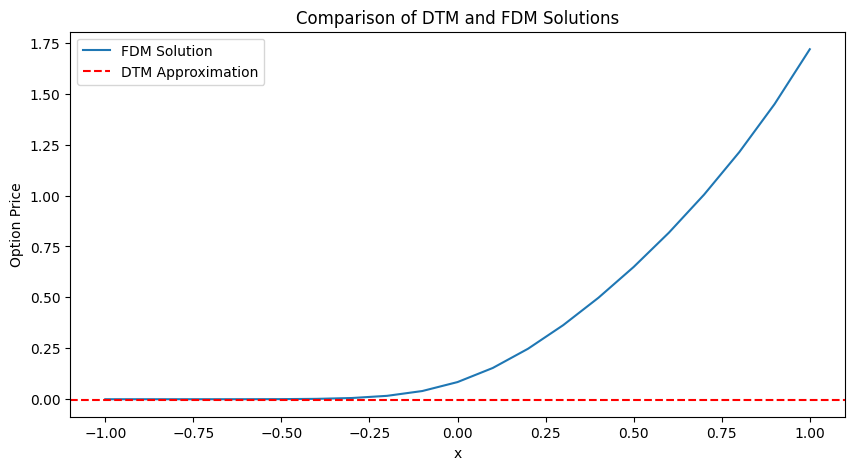

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma, factorial

# Set common parameters
sigma = 0.2
r = 0.05
x_min, x_max = -1, 1
dx = 0.1
T = 1
dt = 0.01
N = int((x_max - x_min) / dx) + 1
M = int(T / dt) + 1
x_values = np.linspace(x_min, x_max, N)

# Initial condition for FDM
def initial_condition_fdm(x):
    return np.maximum(np.exp(x) - 1, 0)

# FDM solver (simplified to one spatial dimension)
def solve_fdm():
    A = sigma**2 / 2
    M_coeff = r
    V = initial_condition_fdm(x_values)
    for n in range(1, M):
        V_new = np.zeros(N)
        for i in range(1, N-1):
            V_new[i] = V[i] + dt * (A * (V[i+1] - 2*V[i] + V[i-1]) / dx**2 - M_coeff * V[i])
        V_new[0], V_new[-1] = V[0], V[-1]
        V = V_new
    return V

# Running the FDM solver
V_fdm = solve_fdm()

# DTM coefficients and parameters
sigma_1, sigma_2, sigma_3 = 0.2, 0.25, 0.3
rho_12, rho_13, rho_23 = 0.5, 0.4, 0.3
k_bar = 1.0

A = sigma_1**2 / 2
B = sigma_2**2 / 2
C = sigma_3**2 / 2
D = r - sigma_1**2 / 2
E = r - sigma_2**2 / 2
F = r - sigma_3**2 / 2
G = k_bar * rho_12 * sigma_1 * sigma_2
H = k_bar * rho_13 * sigma_1 * sigma_3
I = k_bar * rho_23 * sigma_2 * sigma_3
M = r

# Example initial condition and update for DTM
dim_k, dim_h, dim_g = 1, 1, 1  # Reduced to one dimension for comparison
U = np.zeros((dim_k, dim_h, dim_g))

# Simplified delta function
def delta(x):
    return 0.01 * x

def initial_condition_dtm(k):
    return max(1 / factorial(k) - delta(k), 0)

# Initialize U for DTM
for k in range(dim_k):
    U[k, 0, 0] = initial_condition_dtm(k)

# Assuming a very basic step for DTM
alpha = 0.4
gamma_ratio = gamma(alpha + 1) / gamma(alpha)
U_next = gamma_ratio * (A * 2 * U[0, 0, 0] - M * U[0, 0, 0])

# Plot both solutions for comparison
plt.figure(figsize=(10, 5))
plt.plot(x_values, V_fdm, label='FDM Solution')
plt.axhline(y=U_next, color='r', linestyle='--', label='DTM Approximation')
plt.xlabel('x')
plt.ylabel('Option Price')
plt.title('Comparison of DTM and FDM Solutions')
plt.legend()
plt.show()


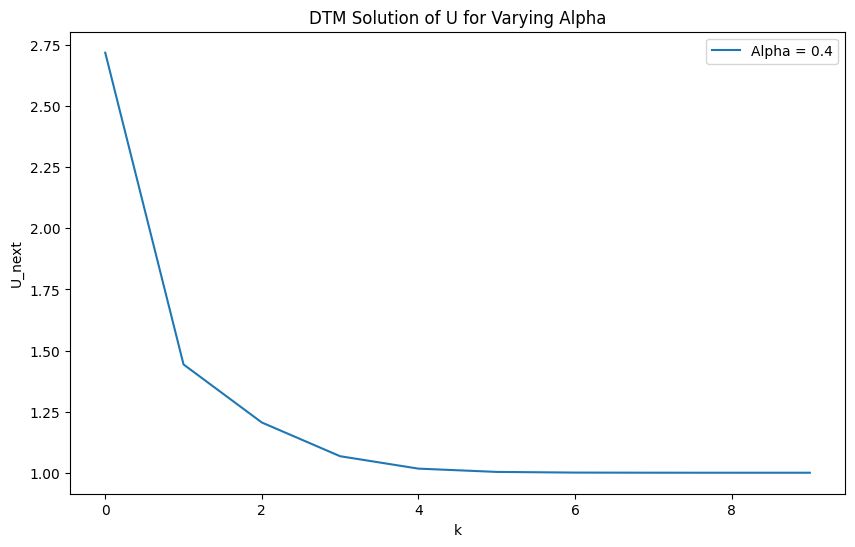

Updated U at (k, h+1, g): 0.0


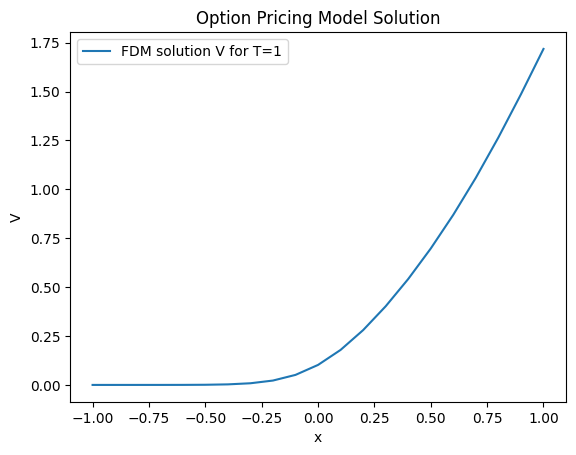

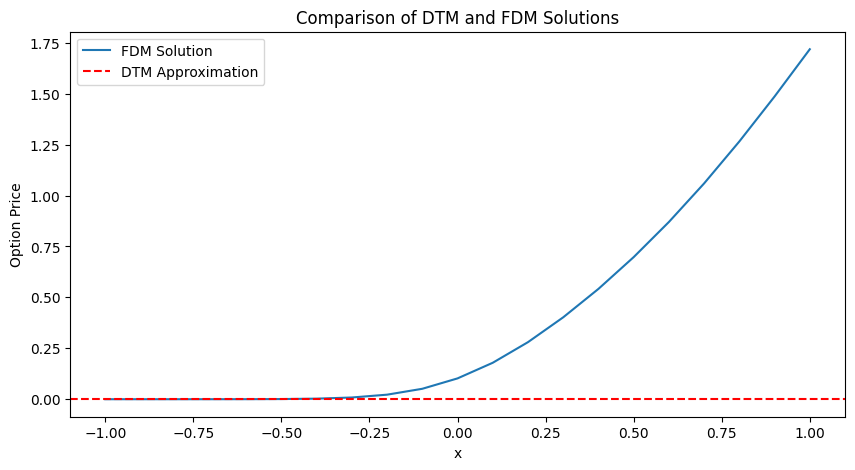

In [9]:
import numpy as np
from scipy.special import gamma, factorial
import matplotlib.pyplot as plt

# Set parameter values
sigma_1, sigma_2, sigma_3 = 0.2, 0.25, 0.3
r = 0.05
rho_12, rho_13, rho_23 = 0.5, 0.4, 0.3
kappa = 1.0

# Coefficients based on the provided formulas
A = sigma_1**2 / 2
B = sigma_2**2 / 2
C = sigma_3**2 / 2
D = r - sigma_1**2 / 2
E = r - sigma_2**2 / 2
F = r - sigma_3**2 / 2
G = kappa * rho_12 * sigma_1 * sigma_2
H = kappa * rho_13 * sigma_1 * sigma_3
I = kappa * rho_23 * sigma_2 * sigma_3
M = r

# Function to compute delta function
def delta(x):
    return 0.01 * x

def U_initial(k, h, g):
    # Calculate the initial condition for given k, h, g
    return max(1/factorial(k) - delta(k), 1/factorial(h) - delta(h), 1/factorial(g) - delta(g), 0)

# Simplified function to compute the next value of U for demonstration purposes
def next_U(U_prev, k, alpha):
    # Simplified calculation assuming only dependency on k and a single coefficient for demonstration
    return ((A + D + G - M) * U_prev + alpha) / gamma(k + 1)  # Simplified formula for demonstration

# Simplified function to solve for U for varying alpha
def solve_U(alphas, max_k=10):
    results = {}
    for alpha in alphas:
        U_next = np.zeros(max_k)
        U_next[0] = initial_condition(1)  # Initial condition for k=1
        for k in range(1, max_k):
            U_next[k] = next_U(U_next[k-1], k, alpha)
        results[alpha] = U_next
    return results

# Set dimensions for U
dim_k, dim_h, dim_g = 4, 4, 4 

# Initialize U
U = np.zeros((dim_k, dim_h, dim_g))

# Main function to run for different alpha values and plot
def main():
    alphas = [0.4]
    results = solve_U(alphas)

    # Plotting DTM
    plt.figure(figsize=(10, 6))
    for alpha, U_next in results.items():
        plt.plot(range(len(U_next)), U_next+1, label=f'Alpha = {alpha}')
    plt.xlabel('k')
    plt.ylabel('U_next')
    plt.title('DTM Solution of U for Varying Alpha')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()

# Calculate U for the next step (H+1) - simplified single step update
# example indices for update 
k, h, g = 1, 1, 1 
gamma_ratio = gamma(alpha * (h + 1) + 1) / gamma(alpha * h + 1) 
U_next = gamma_ratio * (A * (k + 1) * (k + 2) * U[min(k + 2, dim_k-1), h, g] + B * (h + 1) * (h + 2) * U[k, min(h + 2, dim_h-1), g] + C * (g + 1) * (g + 2) * U[k, h, min(g + 2, dim_g-1)] + D * (k + 1) * U[min(k + 1, dim_k-1), h, g] + E * (h + 1) * U[k, min(h + 1, dim_h-1), g] + F * (g + 1) * U[k, h, min(g + 1, dim_g-1)] + G * (k + 1) * (h + 1) * U[min(k + 1, dim_k-1), min(h + 1, dim_h-1), g] + H * (k + 1) * (g + 1) * U[min(k + 1, dim_k-1), h, min(g + 1, dim_g-1)] + I * (h + 1) * (g + 1) * U[k, min(h + 1, dim_h-1), min(g + 1, dim_g-1)] - M * U[k, h, g])

print("Updated U at (k, h+1, g):", U_next)

# Parameters
sigma = 0.2  # Assuming a single sigma for simplicity
r = 0.05
kappa = 1.0
rho = 0.5  # Assuming a single rho for simplicity
x_max, x_min = 1, -1  # Spatial domain
dx = 0.1  # Spatial step size
dt = 0.01  # Time step size
T = 1  # Total time
N = int((x_max - x_min) / dx) + 1  # Number of spatial points
M = int(T / dt) + 1  # Number of time steps

# Coefficients for simplified model
A = sigma**2 / 2
D = r - sigma**2 / 2
M_coeff = r

# Initial condition function
def initial_condition(x):
    return max(np.exp(x) - 1, 0)

# Discretize initial condition
V = np.zeros(N)
x_values = np.linspace(x_min, x_max, N)
for i, x in enumerate(x_values):
    V[i] = initial_condition(x)

# Solve for V over time
for n in range(1, M):
    V_new = np.zeros(N)
    for i in range(1, N-1):
        V_new[i] = V[i] + dt * (A * (V[i+1] - 2*V[i] + V[i-1]) / dx**2 + D * (V[i+1] - V[i-1]) / (2*dx) - M_coeff * V[i])
    V_new[0], V_new[-1] = V[0], V[-1]  # Boundary conditions (can be adjusted)
    V = V_new

# Plotting FDM
plt.plot(x_values, V, label=f'FDM solution V for T={T}')
plt.xlabel('x')
plt.ylabel('V')
plt.title('Option Pricing Model Solution')
plt.legend()
plt.show()

# Plot both solutions for comparison
plt.figure(figsize=(10, 5))
plt.plot(x_values, V_new, label='FDM Solution')
plt.axhline(y=U_next, color='r', linestyle='--', label='DTM Approximation')
plt.xlabel('x')
plt.ylabel('Option Price')
plt.title('Comparison of DTM and FDM Solutions')
plt.legend()
plt.show()


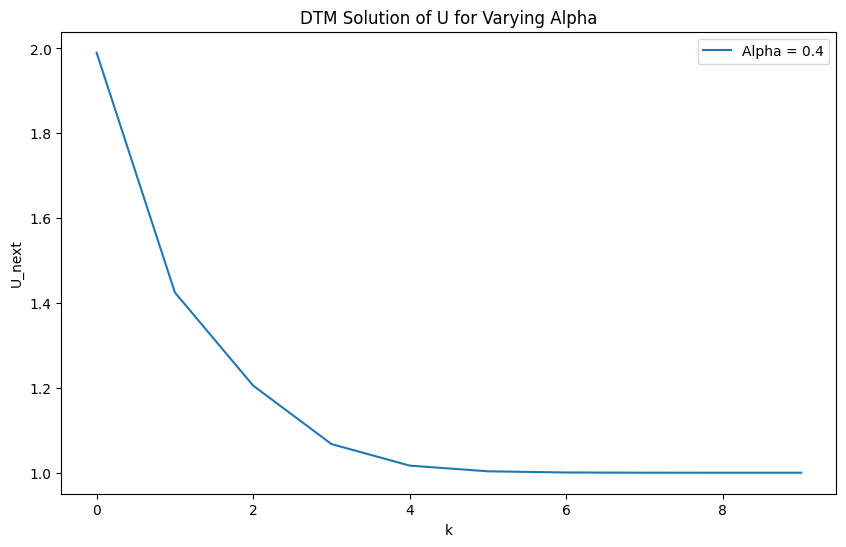

Updated U at (k, h+1, g): 0.0


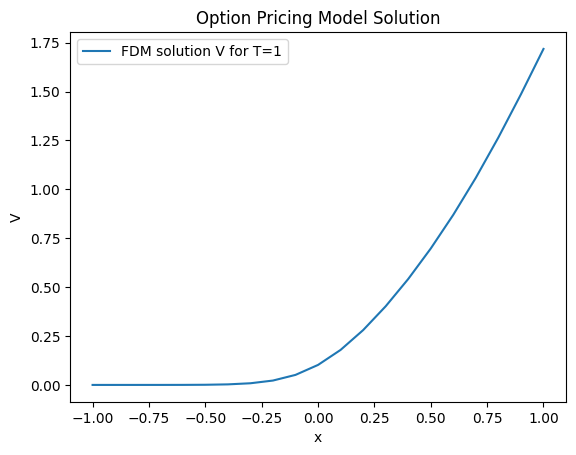

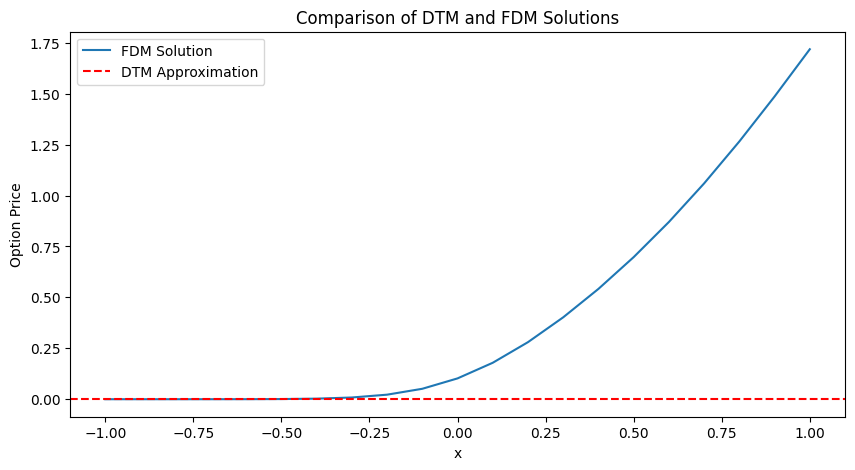

In [8]:
import numpy as np
from scipy.special import gamma, factorial
import matplotlib.pyplot as plt

# Set parameter values
sigma_1, sigma_2, sigma_3 = 0.2, 0.25, 0.3
r = 0.05
rho_12, rho_13, rho_23 = 0.5, 0.4, 0.3
kappa = 1.0

# Coefficients based on the provided formulas
A = sigma_1**2 / 2
B = sigma_2**2 / 2
C = sigma_3**2 / 2
D = r - sigma_1**2 / 2
E = r - sigma_2**2 / 2
F = r - sigma_3**2 / 2
G = kappa * rho_12 * sigma_1 * sigma_2
H = kappa * rho_13 * sigma_1 * sigma_3
I = kappa * rho_23 * sigma_2 * sigma_3
M = r

# Function to compute delta function
def delta(x):
    return 0.01 * x

def U_initial(k, h, g):
    # Calculate the initial condition for given k, h, g
    return max(1/factorial(k) - delta(k), 1/factorial(h) - delta(h), 1/factorial(g) - delta(g), 0)

# Simplified function to compute the next value of U for demonstration purposes
def next_U(U_prev, k, alpha):
    # Simplified calculation assuming only dependency on k and a single coefficient for demonstration
    return ((A + D + G - M) * U_prev + alpha) / gamma(k + 1)  # Simplified formula for demonstration

# Simplified function to solve for U for varying alpha
def solve_U(alphas, max_k=10):
    results = {}
    for alpha in alphas:
        U_next = np.zeros(max_k)
        U_next[0] = U_initial(1,1,1)  # Initial condition for k=1
        for k in range(1, max_k):
            U_next[k] = next_U(U_next[k-1], k, alpha)
        results[alpha] = U_next
    return results

# Set dimensions for U
dim_k, dim_h, dim_g = 4, 4, 4 

# Initialize U
U = np.zeros((dim_k, dim_h, dim_g))

# Main function to run for different alpha values and plot
def main():
    alphas = [0.4]
    results = solve_U(alphas)

    # Plotting DTM
    plt.figure(figsize=(10, 6))
    for alpha, U_next in results.items():
        plt.plot(range(len(U_next)), U_next+1, label=f'Alpha = {alpha}')
    plt.xlabel('k')
    plt.ylabel('U_next')
    plt.title('DTM Solution of U for Varying Alpha')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()

# Calculate U for the next step (H+1) - simplified single step update
# example indices for update 
k, h, g = 1, 1, 1 
gamma_ratio = gamma(alpha * (h + 1) + 1) / gamma(alpha * h + 1) 
U_next = gamma_ratio * (A * (k + 1) * (k + 2) * U[min(k + 2, dim_k-1), h, g] + B * (h + 1) * (h + 2) * U[k, min(h + 2, dim_h-1), g] + C * (g + 1) * (g + 2) * U[k, h, min(g + 2, dim_g-1)] + D * (k + 1) * U[min(k + 1, dim_k-1), h, g] + E * (h + 1) * U[k, min(h + 1, dim_h-1), g] + F * (g + 1) * U[k, h, min(g + 1, dim_g-1)] + G * (k + 1) * (h + 1) * U[min(k + 1, dim_k-1), min(h + 1, dim_h-1), g] + H * (k + 1) * (g + 1) * U[min(k + 1, dim_k-1), h, min(g + 1, dim_g-1)] + I * (h + 1) * (g + 1) * U[k, min(h + 1, dim_h-1), min(g + 1, dim_g-1)] - M * U[k, h, g])

print("Updated U at (k, h+1, g):", U_next)

# Parameters
sigma = 0.2  # Assuming a single sigma for simplicity
r = 0.05
kappa = 1.0
rho = 0.5  # Assuming a single rho for simplicity
x_max, x_min = 1, -1  # Spatial domain
dx = 0.1  # Spatial step size
dt = 0.01  # Time step size
T = 1  # Total time
N = int((x_max - x_min) / dx) + 1  # Number of spatial points
M = int(T / dt) + 1  # Number of time steps

# Coefficients for simplified model
A = sigma**2 / 2
D = r - sigma**2 / 2
M_coeff = r

# Initial condition function
def initial_condition(x):
    return max(np.exp(x) - 1, 0)

# Discretize initial condition
V = np.zeros(N)
x_values = np.linspace(x_min, x_max, N)
for i, x in enumerate(x_values):
    V[i] = initial_condition(x)

# Solve for V over time
for n in range(1, M):
    V_new = np.zeros(N)
    for i in range(1, N-1):
        V_new[i] = V[i] + dt * (A * (V[i+1] - 2*V[i] + V[i-1]) / dx**2 + D * (V[i+1] - V[i-1]) / (2*dx) - M_coeff * V[i])
    V_new[0], V_new[-1] = V[0], V[-1]  # Boundary conditions (can be adjusted)
    V = V_new

# Plotting FDM
plt.plot(x_values, V, label=f'FDM solution V for T={T}')
plt.xlabel('x')
plt.ylabel('V')
plt.title('Option Pricing Model Solution')
plt.legend()
plt.show()

# Plot both solutions for comparison
plt.figure(figsize=(10, 5))
plt.plot(x_values, V_new, label='FDM Solution')
plt.axhline(y=U_next, color='r', linestyle='--', label='DTM Approximation')
plt.xlabel('x')
plt.ylabel('Option Price')
plt.title('Comparison of DTM and FDM Solutions')
plt.legend()
plt.show()
